# Getting Started

you need to install hftbacktest first.

In [1]:
#!pip install hftbacktest

### Loading data

In [2]:
import pandas as pd

# Read gzipped-pickled DataFrame
# Sample data is Binance Futures BNBUSDT
df = pd.read_pickle("usdm/bnbusdt_20221117.pkl", compression='gzip')

# Market depth feed of the data is changes of the quantity of a price.
# So you need the initial snapshot of the market depth in order to build the market depth correctly.
# bnbusdt_20221116.snapshot.pkl is the End-Of-Day(UTC 00:00) market depth snapshot so it's the initial snapshot of 20221117.
snapshot_df = pd.read_pickle("usdm/bnbusdt_20221116.snapshot.pkl", compression='gzip')

### Printing the best bid and the best ask

In [3]:
from numba import njit

# numba.njit is strongly recommended for fast backtesting.
@njit
def print_bbo(hbt):
    # Iterating until hftbacktest reaches the end of data.
    while hbt.run:
        # Move local_timestamp for a given time. time unit is the same as data's timestamp's unit.
        # timestamp of the sample data is in microseconds.
        # Elapse 60-sec every iteration.
        if not hbt.elapse(60 * 1e6):
            # hftbacktest encounters the end of data while elapsing.
            return False
        
        # Print the best bid and the best offer.
        print('local_timestamp:', hbt.local_timestamp,
              ', best_bid:', round(hbt.best_bid, 3),
              ', best_ask:', round(hbt.best_ask, 3))
    return True

In [4]:
from hftbacktest import HftBacktest, FeedLatency, Linear

hbt = HftBacktest(df,
                  tick_size=0.01,   # Tick size of a target trading asset
                  lot_size=0.01,    # Lot size of a target trading asset, minimum trading unit.
                  maker_fee=0.0002, # 0.02%, Maker fee, rebates if it is negative.
                  taker_fee=0.0007, # 0.07%, Taker fee. 
                  order_latency=FeedLatency(), # Latency model: ConstantLatency, FeedLatency.
                  asset_type=Linear, # Asset type: Linear, Inverse.
                  snapshot=snapshot_df) 

You can see the best bid and the best ask every 60-sec.

In [5]:
print_bbo(hbt)

local_timestamp: 1668643260006235 , best_bid: 272.18 , best_ask: 272.19
local_timestamp: 1668643320006235 , best_bid: 271.97 , best_ask: 271.98
local_timestamp: 1668643380006235 , best_bid: 272.32 , best_ask: 272.33
local_timestamp: 1668643440006235 , best_bid: 272.46 , best_ask: 272.47
local_timestamp: 1668643500006235 , best_bid: 272.27 , best_ask: 272.29
local_timestamp: 1668643560006235 , best_bid: 272.1 , best_ask: 272.11
local_timestamp: 1668643620006235 , best_bid: 272.29 , best_ask: 272.3
local_timestamp: 1668643680006235 , best_bid: 272.14 , best_ask: 272.15
local_timestamp: 1668643740006235 , best_bid: 272.3 , best_ask: 272.31
local_timestamp: 1668643800006235 , best_bid: 272.52 , best_ask: 272.53
local_timestamp: 1668643860006235 , best_bid: 272.36 , best_ask: 272.37
local_timestamp: 1668643920006235 , best_bid: 272.58 , best_ask: 272.59
local_timestamp: 1668643980006235 , best_bid: 272.51 , best_ask: 272.52
local_timestamp: 1668644040006235 , best_bid: 272.44 , best_ask: 27

local_timestamp: 1668657900006235 , best_bid: 265.94 , best_ask: 265.96
local_timestamp: 1668657960006235 , best_bid: 265.67 , best_ask: 265.69
local_timestamp: 1668658020006235 , best_bid: 266.14 , best_ask: 266.15
local_timestamp: 1668658080006235 , best_bid: 266.31 , best_ask: 266.33
local_timestamp: 1668658140006235 , best_bid: 266.43 , best_ask: 266.45
local_timestamp: 1668658200006235 , best_bid: 266.6 , best_ask: 266.61
local_timestamp: 1668658260006235 , best_bid: 266.82 , best_ask: 266.83
local_timestamp: 1668658320006235 , best_bid: 266.71 , best_ask: 266.72
local_timestamp: 1668658380006235 , best_bid: 266.69 , best_ask: 266.7
local_timestamp: 1668658440006235 , best_bid: 266.73 , best_ask: 266.74
local_timestamp: 1668658500006235 , best_bid: 266.65 , best_ask: 266.66
local_timestamp: 1668658560006235 , best_bid: 267.04 , best_ask: 267.05
local_timestamp: 1668658620006235 , best_bid: 267.33 , best_ask: 267.34
local_timestamp: 1668658680006235 , best_bid: 267.42 , best_ask: 2

local_timestamp: 1668670080006235 , best_bid: 269.75 , best_ask: 269.76
local_timestamp: 1668670140006235 , best_bid: 269.59 , best_ask: 269.6
local_timestamp: 1668670200006235 , best_bid: 269.38 , best_ask: 269.39
local_timestamp: 1668670260006235 , best_bid: 270.02 , best_ask: 270.03
local_timestamp: 1668670320006235 , best_bid: 269.83 , best_ask: 269.84
local_timestamp: 1668670380006235 , best_bid: 269.73 , best_ask: 269.74
local_timestamp: 1668670440006235 , best_bid: 269.54 , best_ask: 269.55
local_timestamp: 1668670500006235 , best_bid: 269.51 , best_ask: 269.52
local_timestamp: 1668670560006235 , best_bid: 269.89 , best_ask: 269.9
local_timestamp: 1668670620006235 , best_bid: 269.93 , best_ask: 269.94
local_timestamp: 1668670680006235 , best_bid: 270.03 , best_ask: 270.04
local_timestamp: 1668670740006235 , best_bid: 270.0 , best_ask: 270.01
local_timestamp: 1668670800006235 , best_bid: 269.78 , best_ask: 269.79
local_timestamp: 1668670860006235 , best_bid: 269.77 , best_ask: 26

local_timestamp: 1668681780006235 , best_bid: 266.35 , best_ask: 266.36
local_timestamp: 1668681840006235 , best_bid: 266.48 , best_ask: 266.49
local_timestamp: 1668681900006235 , best_bid: 266.49 , best_ask: 266.5
local_timestamp: 1668681960006235 , best_bid: 266.5 , best_ask: 266.51
local_timestamp: 1668682020006235 , best_bid: 266.42 , best_ask: 266.43
local_timestamp: 1668682080006235 , best_bid: 266.49 , best_ask: 266.5
local_timestamp: 1668682140006235 , best_bid: 266.46 , best_ask: 266.47
local_timestamp: 1668682200006235 , best_bid: 266.68 , best_ask: 266.69
local_timestamp: 1668682260006235 , best_bid: 266.44 , best_ask: 266.45
local_timestamp: 1668682320006235 , best_bid: 266.07 , best_ask: 266.08
local_timestamp: 1668682380006235 , best_bid: 266.27 , best_ask: 266.28
local_timestamp: 1668682440006235 , best_bid: 266.27 , best_ask: 266.28
local_timestamp: 1668682500006235 , best_bid: 266.08 , best_ask: 266.09
local_timestamp: 1668682560006235 , best_bid: 265.95 , best_ask: 26

local_timestamp: 1668693960006235 , best_bid: 266.39 , best_ask: 266.4
local_timestamp: 1668694020006235 , best_bid: 265.86 , best_ask: 265.87
local_timestamp: 1668694080006235 , best_bid: 265.67 , best_ask: 265.68
local_timestamp: 1668694140006235 , best_bid: 265.89 , best_ask: 265.9
local_timestamp: 1668694200006235 , best_bid: 265.87 , best_ask: 265.88
local_timestamp: 1668694260006235 , best_bid: 265.59 , best_ask: 265.6
local_timestamp: 1668694320006235 , best_bid: 265.7 , best_ask: 265.71
local_timestamp: 1668694380006235 , best_bid: 265.52 , best_ask: 265.53
local_timestamp: 1668694440006235 , best_bid: 265.85 , best_ask: 265.86
local_timestamp: 1668694500006235 , best_bid: 266.24 , best_ask: 266.25
local_timestamp: 1668694560006235 , best_bid: 266.37 , best_ask: 266.38
local_timestamp: 1668694620006235 , best_bid: 266.32 , best_ask: 266.33
local_timestamp: 1668694680006235 , best_bid: 266.06 , best_ask: 266.07
local_timestamp: 1668694740006235 , best_bid: 265.94 , best_ask: 265

local_timestamp: 1668702840006235 , best_bid: 268.88 , best_ask: 268.89
local_timestamp: 1668702900006235 , best_bid: 268.85 , best_ask: 268.86
local_timestamp: 1668702960006235 , best_bid: 268.88 , best_ask: 268.89
local_timestamp: 1668703020006235 , best_bid: 268.76 , best_ask: 268.77
local_timestamp: 1668703080006235 , best_bid: 268.88 , best_ask: 268.89
local_timestamp: 1668703140006235 , best_bid: 269.0 , best_ask: 269.01
local_timestamp: 1668703200006235 , best_bid: 268.69 , best_ask: 268.7
local_timestamp: 1668703260006235 , best_bid: 268.4 , best_ask: 268.41
local_timestamp: 1668703320006235 , best_bid: 268.71 , best_ask: 268.72
local_timestamp: 1668703380006235 , best_bid: 268.9 , best_ask: 268.91
local_timestamp: 1668703440006235 , best_bid: 268.87 , best_ask: 268.88
local_timestamp: 1668703500006235 , best_bid: 268.72 , best_ask: 268.73
local_timestamp: 1668703560006235 , best_bid: 268.85 , best_ask: 268.86
local_timestamp: 1668703620006235 , best_bid: 268.99 , best_ask: 269

local_timestamp: 1668717300006235 , best_bid: 267.91 , best_ask: 267.93
local_timestamp: 1668717360006235 , best_bid: 267.96 , best_ask: 267.97
local_timestamp: 1668717420006235 , best_bid: 267.76 , best_ask: 267.77
local_timestamp: 1668717480006235 , best_bid: 267.84 , best_ask: 267.85
local_timestamp: 1668717540006235 , best_bid: 267.65 , best_ask: 267.66
local_timestamp: 1668717600006235 , best_bid: 267.61 , best_ask: 267.62
local_timestamp: 1668717660006235 , best_bid: 267.56 , best_ask: 267.58
local_timestamp: 1668717720006235 , best_bid: 267.54 , best_ask: 267.55
local_timestamp: 1668717780006235 , best_bid: 267.54 , best_ask: 267.55
local_timestamp: 1668717840006235 , best_bid: 267.43 , best_ask: 267.44
local_timestamp: 1668717900006235 , best_bid: 267.45 , best_ask: 267.46
local_timestamp: 1668717960006235 , best_bid: 267.73 , best_ask: 267.74
local_timestamp: 1668718020006235 , best_bid: 267.52 , best_ask: 267.53
local_timestamp: 1668718080006235 , best_bid: 267.58 , best_ask:

False

### Getting market depth

In [6]:
@njit
def print_3depth(hbt):
    while hbt.run:
        if not hbt.elapse(60 * 1e6):
            return False
        
        # a key of bid_depth or ask_depth is price in tick format.
        # (integer) price_tick = price / tick_size
        print('local_timestamp:', hbt.local_timestamp)
        i = 0
        for tick_price in range(hbt.best_ask_tick, hbt.high_ask_tick + 1):
            if tick_price in hbt.ask_depth:
                print('ask: ', hbt.ask_depth[tick_price], '@', round(tick_price * hbt.tick_size, 3))
                i += 1
                if i == 3:
                    break
        i = 0
        for tick_price in range(hbt.best_bid_tick, hbt.low_bid_tick - 1, -1):
            if tick_price in hbt.bid_depth:
                print('bid: ', hbt.bid_depth[tick_price], '@', round(tick_price * hbt.tick_size, 3))
                i += 1
                if i == 3:
                    break
    return True

In [7]:
hbt = HftBacktest(df,
                  tick_size=0.01,
                  lot_size=0.01,
                  maker_fee=0.0002,
                  taker_fee=0.0007,
                  order_latency=FeedLatency(),
                  asset_type=Linear,
                  snapshot=snapshot_df)
print_3depth(hbt)

local_timestamp: 1668643260006235
ask:  0.27 @ 272.19
ask:  3.7 @ 272.2
ask:  7.98 @ 272.21
bid:  9.33 @ 272.18
bid:  5.82 @ 272.17
bid:  18.83 @ 272.16
local_timestamp: 1668643320006235
ask:  7.54 @ 271.98
ask:  13.32 @ 271.99
ask:  2.83 @ 272.0
bid:  31.93 @ 271.97
bid:  8.66 @ 271.95
bid:  32.91 @ 271.94
local_timestamp: 1668643380006235
ask:  14.44 @ 272.33
ask:  4.14 @ 272.34
ask:  18.76 @ 272.35
bid:  0.72 @ 272.32
bid:  6.89 @ 272.31
bid:  5.02 @ 272.3
local_timestamp: 1668643440006235
ask:  42.64 @ 272.47
ask:  19.68 @ 272.48
ask:  47.57 @ 272.49
bid:  0.41 @ 272.46
bid:  1.93 @ 272.43
bid:  3.95 @ 272.42
local_timestamp: 1668643500006235
ask:  4.0 @ 272.29
ask:  6.19 @ 272.3
ask:  22.76 @ 272.31
bid:  15.78 @ 272.27
bid:  25.48 @ 272.26
bid:  2.96 @ 272.25
local_timestamp: 1668643560006235
ask:  0.79 @ 272.11
ask:  4.61 @ 272.12
ask:  9.68 @ 272.13
bid:  4.07 @ 272.1
bid:  4.7 @ 272.09
bid:  1.82 @ 272.08
local_timestamp: 1668643620006235
ask:  22.22 @ 272.3
ask:  10.86 @ 272.

local_timestamp: 1668657840006235
ask:  4.92 @ 268.22
ask:  2.08 @ 268.23
ask:  0.35 @ 268.24
bid:  3.01 @ 268.21
bid:  0.23 @ 268.2
bid:  6.74 @ 268.19
local_timestamp: 1668657900006235
ask:  0.15 @ 265.96
ask:  4.9 @ 265.97
ask:  7.95 @ 265.98
bid:  0.97 @ 265.94
bid:  1.13 @ 265.93
bid:  1.88 @ 265.92
local_timestamp: 1668657960006235
ask:  0.38 @ 265.69
ask:  5.79 @ 265.7
ask:  2.08 @ 265.71
bid:  2.7 @ 265.67
bid:  1.82 @ 265.66
bid:  6.0 @ 265.65
local_timestamp: 1668658020006235
ask:  0.59 @ 266.15
ask:  4.25 @ 266.16
ask:  4.25 @ 266.17
bid:  1.4 @ 266.14
bid:  1.66 @ 266.13
bid:  1.54 @ 266.12
local_timestamp: 1668658080006235
ask:  1.83 @ 266.33
ask:  7.72 @ 266.34
ask:  5.99 @ 266.35
bid:  11.33 @ 266.31
bid:  7.02 @ 266.3
bid:  4.88 @ 266.29
local_timestamp: 1668658140006235
ask:  0.7 @ 266.45
ask:  38.18 @ 266.46
ask:  14.08 @ 266.47
bid:  10.81 @ 266.43
bid:  5.04 @ 266.42
bid:  33.1 @ 266.41
local_timestamp: 1668658200006235
ask:  3.12 @ 266.61
ask:  0.15 @ 266.62
ask:  

local_timestamp: 1668669480006235
ask:  0.3 @ 268.69
ask:  0.2 @ 268.7
ask:  8.82 @ 268.71
bid:  30.8 @ 268.68
bid:  4.07 @ 268.67
bid:  10.29 @ 268.66
local_timestamp: 1668669540006235
ask:  12.55 @ 268.78
ask:  25.11 @ 268.79
ask:  12.05 @ 268.8
bid:  0.19 @ 268.77
bid:  4.66 @ 268.76
bid:  12.62 @ 268.75
local_timestamp: 1668669600006235
ask:  2.61 @ 268.69
ask:  1.6 @ 268.71
ask:  15.47 @ 268.72
bid:  3.65 @ 268.68
bid:  14.2 @ 268.67
bid:  30.01 @ 268.66
local_timestamp: 1668669660006235
ask:  0.13 @ 268.55
ask:  7.75 @ 268.58
ask:  29.47 @ 268.59
bid:  28.96 @ 268.54
bid:  11.8 @ 268.53
bid:  6.03 @ 268.52
local_timestamp: 1668669720006235
ask:  5.01 @ 268.5
ask:  0.15 @ 268.51
ask:  5.87 @ 268.52
bid:  1.07 @ 268.49
bid:  13.55 @ 268.48
bid:  26.93 @ 268.47
local_timestamp: 1668669780006235
ask:  19.94 @ 268.42
ask:  5.18 @ 268.43
ask:  27.76 @ 268.44
bid:  1.14 @ 268.41
bid:  3.66 @ 268.4
bid:  1.88 @ 268.39
local_timestamp: 1668669840006235
ask:  2.97 @ 268.68
ask:  0.22 @ 268

local_timestamp: 1668680520006235
ask:  20.89 @ 265.81
ask:  9.26 @ 265.82
ask:  16.46 @ 265.83
bid:  0.84 @ 265.8
bid:  8.96 @ 265.79
bid:  13.44 @ 265.78
local_timestamp: 1668680580006235
ask:  11.22 @ 265.91
ask:  11.84 @ 265.92
ask:  30.14 @ 265.93
bid:  0.12 @ 265.9
bid:  1.6 @ 265.89
bid:  10.71 @ 265.88
local_timestamp: 1668680640006235
ask:  1.63 @ 266.13
ask:  2.34 @ 266.14
ask:  14.99 @ 266.15
bid:  10.59 @ 266.12
bid:  16.58 @ 266.11
bid:  21.96 @ 266.1
local_timestamp: 1668680700006235
ask:  26.21 @ 266.29
ask:  88.52 @ 266.3
ask:  3.42 @ 266.31
bid:  6.02 @ 266.28
bid:  10.3 @ 266.27
bid:  9.62 @ 266.26
local_timestamp: 1668680760006235
ask:  6.84 @ 266.2
ask:  22.12 @ 266.21
ask:  7.87 @ 266.22
bid:  40.2 @ 266.19
bid:  1.95 @ 266.18
bid:  1.8 @ 266.17
local_timestamp: 1668680820006235
ask:  1.71 @ 266.32
ask:  0.21 @ 266.33
ask:  0.17 @ 266.34
bid:  26.8 @ 266.31
bid:  29.24 @ 266.3
bid:  10.36 @ 266.29
local_timestamp: 1668680880006235
ask:  0.34 @ 266.42
ask:  0.6 @ 26

local_timestamp: 1668691920006235
ask:  0.48 @ 266.07
ask:  1.83 @ 266.09
ask:  4.41 @ 266.1
bid:  26.97 @ 266.06
bid:  1.6 @ 266.05
bid:  1.73 @ 266.04
local_timestamp: 1668691980006235
ask:  0.33 @ 265.91
ask:  2.13 @ 265.93
ask:  11.96 @ 265.94
bid:  8.37 @ 265.9
bid:  8.81 @ 265.89
bid:  14.97 @ 265.88
local_timestamp: 1668692040006235
ask:  0.05 @ 265.87
ask:  0.74 @ 265.89
ask:  8.45 @ 265.9
bid:  33.73 @ 265.86
bid:  20.48 @ 265.85
bid:  6.12 @ 265.84
local_timestamp: 1668692100006235
ask:  14.22 @ 265.64
ask:  1.1 @ 265.65
ask:  9.44 @ 265.66
bid:  35.0 @ 265.63
bid:  0.3 @ 265.62
bid:  3.06 @ 265.61
local_timestamp: 1668692160006235
ask:  1.5 @ 265.46
ask:  2.4 @ 265.48
ask:  2.06 @ 265.49
bid:  78.61 @ 265.45
bid:  11.85 @ 265.44
bid:  4.63 @ 265.43
local_timestamp: 1668692220006235
ask:  0.29 @ 265.76
ask:  7.03 @ 265.8
ask:  13.7 @ 265.81
bid:  29.08 @ 265.75
bid:  17.9 @ 265.74
bid:  4.4 @ 265.73
local_timestamp: 1668692280006235
ask:  1.3 @ 265.77
ask:  2.35 @ 265.78
ask:

local_timestamp: 1668700740006235
ask:  6.25 @ 266.08
ask:  1.49 @ 266.1
ask:  7.6 @ 266.11
bid:  26.68 @ 266.07
bid:  4.18 @ 266.06
bid:  0.02 @ 266.05
local_timestamp: 1668700800006235
ask:  22.41 @ 266.08
ask:  4.3 @ 266.09
ask:  11.36 @ 266.1
bid:  0.14 @ 266.07
bid:  24.27 @ 266.06
bid:  7.13 @ 266.05
local_timestamp: 1668700860006235
ask:  0.22 @ 266.65
ask:  6.39 @ 266.69
ask:  2.16 @ 266.7
bid:  40.46 @ 266.64
bid:  8.39 @ 266.63
bid:  9.33 @ 266.62
local_timestamp: 1668700920006235
ask:  29.01 @ 266.07
ask:  16.92 @ 266.09
ask:  13.65 @ 266.1
bid:  0.06 @ 266.06
bid:  12.39 @ 266.03
bid:  10.71 @ 266.02
local_timestamp: 1668700980006235
ask:  1.6 @ 266.5
ask:  7.92 @ 266.52
ask:  35.31 @ 266.53
bid:  17.91 @ 266.49
bid:  13.68 @ 266.48
bid:  21.63 @ 266.47
local_timestamp: 1668701040006235
ask:  20.43 @ 266.61
ask:  2.57 @ 266.62
ask:  10.78 @ 266.63
bid:  2.69 @ 266.6
bid:  4.07 @ 266.58
bid:  10.62 @ 266.57
local_timestamp: 1668701100006235
ask:  18.18 @ 266.65
ask:  26.22 @

local_timestamp: 1668713280006235
ask:  35.25 @ 267.92
ask:  42.8 @ 267.93
ask:  21.53 @ 267.94
bid:  0.12 @ 267.91
bid:  5.2 @ 267.9
bid:  1.7 @ 267.89
local_timestamp: 1668713340006235
ask:  21.28 @ 267.93
ask:  14.26 @ 267.94
ask:  54.78 @ 267.95
bid:  8.34 @ 267.92
bid:  13.83 @ 267.9
bid:  28.18 @ 267.89
local_timestamp: 1668713400006235
ask:  13.27 @ 267.96
ask:  5.5 @ 267.97
ask:  14.97 @ 267.98
bid:  11.06 @ 267.95
bid:  9.32 @ 267.94
bid:  16.96 @ 267.93
local_timestamp: 1668713460006235
ask:  8.3 @ 267.99
ask:  7.26 @ 268.0
ask:  1.8 @ 268.01
bid:  26.27 @ 267.98
bid:  11.96 @ 267.97
bid:  31.87 @ 267.96
local_timestamp: 1668713520006235
ask:  2.08 @ 267.93
ask:  3.96 @ 267.94
ask:  20.82 @ 267.95
bid:  24.98 @ 267.92
bid:  7.29 @ 267.91
bid:  19.1 @ 267.9
local_timestamp: 1668713580006235
ask:  17.88 @ 267.87
ask:  14.2 @ 267.88
ask:  31.49 @ 267.89
bid:  23.97 @ 267.86
bid:  28.42 @ 267.85
bid:  26.99 @ 267.84
local_timestamp: 1668713640006235
ask:  1.91 @ 267.9
ask:  14.4 

False

### Submitting an order

In [8]:
from hftbacktest import GTC, NONE, NEW, FILLED, CANCELED, EXPIRED

@njit
def print_orders(hbt):
    # You can access open orders and also closed orders via hbt.orders.
    # hbt.orders is a Numba dictionary and its key is order_id(int).
    for order_id, order in hbt.orders.items():
        order_status = ''
        if order.status == NONE:
            order_status = 'NONE' # Exchange hasn't received an order yet.
        elif order.status == NEW:
            order_status = 'NEW'
        elif order.status == FILLED:
            order_status = 'FILLED'
        elif order.status == CANCELED:
            order_status = 'CANCELED'
        elif order.status == EXPIRED:
            order_status = 'EXPIRED' 
            
        order_req = ''
        if order.req == NONE:
            order_req = 'NONE'
        elif order.req == NEW:
            order_req = 'NEW'
        elif order.req == CANCELED:
            order_req = 'CANCEL'
            
        print('local_timestamp:', hbt.local_timestamp, 
              ', order_id:', order_id,
              ', order_price:', order.price,
              ', order_qty:', order.qty,
              ', order_status:', order_status,
              ', order_req:', order_req)

@njit
def submit_order(hbt):
    is_order_submitted = False
    while hbt.run:
        if not hbt.elapse(60 * 1e6):
            return False
        
        # Print open orders.
        print_orders(hbt)
        
        if not is_order_submitted:
            # Submit a buy order at 100 tick below the best bid.
            order_id = 1
            order_price = hbt.best_bid - 100 * hbt.tick_size
            order_qty = 1
            time_in_force = GTC # Good 'till cancel
            hbt.submit_buy_order(order_id, order_price, order_qty, time_in_force)
            is_order_submitted = True
    return True

In [9]:
hbt = HftBacktest(df,
                  tick_size=0.01,
                  lot_size=0.01,
                  maker_fee=0.0002,
                  taker_fee=0.0007,
                  order_latency=FeedLatency(),
                  asset_type=Linear,
                  snapshot=snapshot_df)
submit_order(hbt)

local_timestamp: 1668643320006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668643380006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668643440006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668643500006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668643560006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668643620006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668643680006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668643740006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE


local_timestamp: 1668657900006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668657960006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668658020006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668658080006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668658140006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668658200006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668658260006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668658320006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: F

local_timestamp: 1668669300006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668669360006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668669420006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668669480006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668669540006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668669600006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668669660006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668669720006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: F

local_timestamp: 1668680340006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668680400006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668680460006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668680520006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668680580006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668680640006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668680700006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668680760006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: F

local_timestamp: 1668690300006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668690360006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668690420006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668690480006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668690540006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668690600006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668690660006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668690720006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: F

local_timestamp: 1668699000006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668699060006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668699120006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668699180006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668699240006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668699300006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668699360006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668699420006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: F

local_timestamp: 1668708300006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668708360006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668708420006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668708480006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668708540006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668708600006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668708660006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668708720006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: F

local_timestamp: 1668724380006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668724440006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668724500006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668724560006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668724620006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668724680006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668724740006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668724800006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: F

False

### Clearing inactive orders (FILLED, CANCELED, EXPIRED)

In [10]:
from hftbacktest import GTC

@njit
def clear_inactive_orders(hbt):
    is_order_submitted = False
    while hbt.run:
        if not hbt.elapse(60 * 1e6):
            return False
        
        print_orders(hbt)
        
        # Remove inactive(FILLED, CANCELED, EXPIRED) orders from hbt.orders.
        hbt.clear_inactive_orders()
        
        if not is_order_submitted:
            order_id = 1
            order_price = hbt.best_bid - 100 * hbt.tick_size
            order_qty = 1
            time_in_force = GTC
            hbt.submit_buy_order(order_id, order_price, order_qty, time_in_force)
            is_order_submitted = True
    return True

In [11]:
hbt = HftBacktest(df,
                  tick_size=0.01,
                  lot_size=0.01,
                  maker_fee=0.0002,
                  taker_fee=0.0007,
                  order_latency=FeedLatency(),
                  asset_type=Linear,
                  snapshot=snapshot_df)
clear_inactive_orders(hbt)

local_timestamp: 1668643320006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668643380006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668643440006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668643500006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668643560006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668643620006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668643680006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668643740006235 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: NEW , order_req: NONE


False

### Watching order status - pending due to order latency

In [12]:
from hftbacktest import GTC

@njit
def watch_pending(hbt):
    is_order_submitted = False
    while hbt.run:
        # Elapse 0.01-sec every iteration.
        if not hbt.elapse(0.01 * 1e6):
            return False
        
        print_orders(hbt)
        
        hbt.clear_inactive_orders()
        
        if not is_order_submitted:
            order_id = 1
            order_price = hbt.best_bid - 100 * hbt.tick_size
            order_qty = 1
            time_in_force = GTC
            hbt.submit_buy_order(order_id, order_price, order_qty, time_in_force)
            is_order_submitted = True
            
        # Prevent too many prints
        if hbt.orders[order_id].status == NEW:
            return False
    return True

In [13]:
hbt = HftBacktest(df,
                  tick_size=0.01,
                  lot_size=0.01,
                  maker_fee=0.0002,
                  taker_fee=0.0007,
                  order_latency=FeedLatency(),
                  asset_type=Linear,
                  snapshot=snapshot_df)
watch_pending(hbt)

local_timestamp: 1668643200026235 , order_id: 1 , order_price: 270.74 , order_qty: 1.0 , order_status: NONE , order_req: NEW
local_timestamp: 1668643200036235 , order_id: 1 , order_price: 270.74 , order_qty: 1.0 , order_status: NONE , order_req: NEW
local_timestamp: 1668643200046235 , order_id: 1 , order_price: 270.74 , order_qty: 1.0 , order_status: NONE , order_req: NEW
local_timestamp: 1668643200056235 , order_id: 1 , order_price: 270.74 , order_qty: 1.0 , order_status: NEW , order_req: NONE


False

### Waiting for order response

In [14]:
from hftbacktest import GTC

@njit
def wait_for_order_response(hbt):
    order_id = 0
    is_order_submitted = False
    while hbt.run:
        if not hbt.elapse(0.01 * 1e6):
            return False
        
        print_orders(hbt)
        
        hbt.clear_inactive_orders()
        
        # Prevent too many prints
        if order_id in hbt.orders:
            if hbt.orders[order_id].status == NEW:
                return False
        
        if not is_order_submitted:
            order_id = 1
            order_price = hbt.best_bid
            order_qty = 1
            time_in_force = GTC
            hbt.submit_buy_order(order_id, order_price, order_qty, time_in_force)
            # Wait for the order response for a given order id.
            print('an order is submitted at', hbt.local_timestamp)
            hbt.wait_order_response(order_id)
            print('an order response is received at', hbt.local_timestamp)
            is_order_submitted = True
    return True

In [15]:
hbt = HftBacktest(df,
                  tick_size=0.01,
                  lot_size=0.01,
                  maker_fee=0.0002,
                  taker_fee=0.0007,
                  order_latency=FeedLatency(),
                  asset_type=Linear,
                  snapshot=snapshot_df)
wait_for_order_response(hbt)

an order is submitted at 1668643200016235
an order response is received at 1668643200054483
local_timestamp: 1668643200064483 , order_id: 1 , order_price: 271.74 , order_qty: 1.0 , order_status: NEW , order_req: NONE


False

### Printing Position, Balance, Fee, Equity

In [16]:
@njit
def position(hbt):
    is_order_submitted = False
    while hbt.run:
        if not hbt.elapse(60 * 1e6):
            return False
        
        print_orders(hbt)
        
        hbt.clear_inactive_orders()
        
        # Print position, balance, fee, and equity
        print('local_timestamp:', hbt.local_timestamp,
              ', position:', hbt.position,
              ', balance:', hbt.balance,
              ', fee:', hbt.fee,
              ', equity:', hbt.equity)
        
        if not is_order_submitted:
            order_id = 1
            order_price = hbt.best_bid
            order_qty = 1
            time_in_force = GTC
            hbt.submit_buy_order(order_id, order_price, order_qty, time_in_force)
            hbt.wait_order_response(order_id)
            is_order_submitted = True
    return True

In [17]:
hbt = HftBacktest(df,
                  tick_size=0.01,
                  lot_size=0.01,
                  maker_fee=0.0002,
                  taker_fee=0.0007,
                  order_latency=FeedLatency(),
                  asset_type=Linear,
                  snapshot=snapshot_df)
position(hbt)

local_timestamp: 1668643260006235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668643320027740 , order_id: 1 , order_price: 272.18 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668643320027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -0.25943599999998407
local_timestamp: 1668643380027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: 0.08056399999999089
local_timestamp: 1668643440027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: 0.230564000000025
local_timestamp: 1668643500027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: 0.04556399999996589
local_timestamp: 1668643560027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -0.12943599999998864
local_timestamp: 1668643620027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: 0.06056400000000909
local_timestamp: 166

local_timestamp: 1668657900027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -6.284436000000018
local_timestamp: 1668657960027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -6.5494360000000045
local_timestamp: 1668658020027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -6.059435999999995
local_timestamp: 1668658080027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -5.914436000000014
local_timestamp: 1668658140027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -5.839436000000025
local_timestamp: 1668658200027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -5.629435999999989
local_timestamp: 1668658260027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -5.409436000000018
local_timestamp: 1668658320027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -5.5194359

local_timestamp: 1668668220027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -3.0594359999999954
local_timestamp: 1668668280027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -3.269435999999975
local_timestamp: 1668668340027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -3.3994359999999704
local_timestamp: 1668668400027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -3.2194360000000204
local_timestamp: 1668668460027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -3.079436000000034
local_timestamp: 1668668520027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -3.2894360000000136
local_timestamp: 1668668580027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -3.2894360000000136
local_timestamp: 1668668640027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -3.279

local_timestamp: 1668679260027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -7.39943599999997
local_timestamp: 1668679320027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -7.379435999999989
local_timestamp: 1668679380027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -7.579436000000034
local_timestamp: 1668679440027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -7.46943600000002
local_timestamp: 1668679500027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -7.569435999999986
local_timestamp: 1668679560027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -7.759435999999984
local_timestamp: 1668679620027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -7.259435999999984
local_timestamp: 1668679680027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -7.1394359999

local_timestamp: 1668691740027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -6.269435999999975
local_timestamp: 1668691800027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -6.169436000000009
local_timestamp: 1668691860027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -5.569435999999986
local_timestamp: 1668691920027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -6.169436000000009
local_timestamp: 1668691980027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -6.329436000000034
local_timestamp: 1668692040027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -6.369435999999998
local_timestamp: 1668692100027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -6.599436000000016
local_timestamp: 1668692160027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -6.77943600

local_timestamp: 1668701400027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -5.309435999999995
local_timestamp: 1668701460027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -5.2994360000000045
local_timestamp: 1668701520027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -5.009435999999984
local_timestamp: 1668701580027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -5.009435999999984
local_timestamp: 1668701640027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.769435999999975
local_timestamp: 1668701700027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.369435999999998
local_timestamp: 1668701760027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.629435999999989
local_timestamp: 1668701820027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.4394359

local_timestamp: 1668712620027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.249435999999993
local_timestamp: 1668712680027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.289436000000014
local_timestamp: 1668712740027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.239436000000002
local_timestamp: 1668712800027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.269435999999975
local_timestamp: 1668712860027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.359436000000007
local_timestamp: 1668712920027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.339436000000025
local_timestamp: 1668712980027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.369435999999998
local_timestamp: 1668713040027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.26943599

local_timestamp: 1668727740027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.679436
local_timestamp: 1668727800027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.479436000000011
local_timestamp: 1668727860027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.879435999999989
local_timestamp: 1668727920027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.679436
local_timestamp: 1668727980027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.64943599999997
local_timestamp: 1668728040027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.849436000000016
local_timestamp: 1668728100027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -4.849436000000016
local_timestamp: 1668728160027740 , position: 1.0 , balance: -272.18 , fee: 0.054436000000000005 , equity: -5.119435999999998
local_times

False

### Canceling an open order

In [18]:
@njit
def submit_and_cancel_order(hbt):
    is_order_submitted = False
    while hbt.run:
        if not hbt.elapse(0.1 * 1e6):
            return False
        
        print_orders(hbt)
        
        hbt.clear_inactive_orders()
        
        # Cancel if there is an open order
        for order_id, order in hbt.orders.items():
            # an order is only cancellable if order status is NEW.
            # cancel request is negated if the order is already filled or filled before cancel request is processed.
            if order.cancellable:
                hbt.cancel(order_id)
                # You can see status still NEW and see req CANCEL.
                print_orders(hbt)
                # cancel request also has order entry/response latencies the same as submitting.
                hbt.wait_order_response(order_id)
       
        if not is_order_submitted:
            order_id = 1
            order_price = hbt.best_bid - 100 * hbt.tick_size
            order_qty = 1
            time_in_force = GTC
            hbt.submit_buy_order(order_id, order_price, order_qty, time_in_force)
            hbt.wait_order_response(order_id)
            is_order_submitted = True
        else:
            if len(hbt.orders) == 0:
                return False
    return True

In [19]:
hbt = HftBacktest(df,
                  tick_size=0.01,
                  lot_size=0.01,
                  maker_fee=0.0002,
                  taker_fee=0.0007,
                  order_latency=FeedLatency(),
                  asset_type=Linear,
                  snapshot=snapshot_df)
submit_and_cancel_order(hbt)

local_timestamp: 1668643200234035 , order_id: 1 , order_price: 270.72 , order_qty: 1.0 , order_status: NEW , order_req: NONE
local_timestamp: 1668643200234035 , order_id: 1 , order_price: 270.72 , order_qty: 1.0 , order_status: NEW , order_req: CANCEL
local_timestamp: 1668643201365593 , order_id: 1 , order_price: 270.72 , order_qty: 1.0 , order_status: CANCELED , order_req: NONE


False

### Market order

In [20]:
@njit
def print_orders_exec_price(hbt):
    for order_id, order in hbt.orders.items():
        order_status = ''
        if order.status == NONE:
            order_status = 'NONE'
        elif order.status == NEW:
            order_status = 'NEW'
        elif order.status == FILLED:
            order_status = 'FILLED'
        elif order.status == CANCELED:
            order_status = 'CANCELED'
        elif order.status == EXPIRED:
            order_status = 'EXPIRED' 
            
        order_req = ''
        if order.req == NONE:
            order_req = 'NONE'
        elif order.req == NEW:
            order_req = 'NEW'
        elif order.req == CANCELED:
            order_req = 'CANCEL'
            
        print('local_timestamp:', hbt.local_timestamp, 
              ', order_id:', order_id,
              ', order_price:', order.price,
              ', order_qty:', order.qty,
              ', order_status:', order_status,
              ', exec_price:', order.exec_price)
        
@njit
def market_order(hbt):
    is_order_submitted = False
    while hbt.run:
        if not hbt.elapse(60 * 1e6):
            return False
        
        print_orders(hbt)
        
        hbt.clear_inactive_orders()
        
        print('local_timestamp:', hbt.local_timestamp,
              ', position:', hbt.position,
              ', balance:', hbt.balance,
              ', fee:', hbt.fee,
              ', equity:', hbt.equity)
        
        if not is_order_submitted:
            order_id = 1
            # Set a deep price in the opposite side to take liquidity.
            order_price = hbt.best_bid - 50 * hbt.tick_size
            order_qty = 1
            time_in_force = GTC
            hbt.submit_sell_order(order_id, order_price, order_qty, time_in_force)
            hbt.wait_order_response(order_id)
            # You can see the order immediately filled.
            # Also you can see the order executed at the best bid which is different from what it was submitted at.
            print('best_bid:', hbt.best_bid)
            print_orders_exec_price(hbt)            
            is_order_submitted = True
    return True

In [21]:
hbt = HftBacktest(df,
                  tick_size=0.01,
                  lot_size=0.01,
                  maker_fee=0.0002,
                  taker_fee=0.0007,
                  order_latency=FeedLatency(),
                  asset_type=Linear,
                  snapshot=snapshot_df)
market_order(hbt)

local_timestamp: 1668643260006235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
best_bid: 272.18
local_timestamp: 1668643260027740 , order_id: 1 , order_price: 271.68 , order_qty: 1.0 , order_status: FILLED , exec_price: 272.18
local_timestamp: 1668643320027740 , order_id: 1 , order_price: 271.68 , order_qty: 1.0 , order_status: FILLED , order_req: NONE
local_timestamp: 1668643320027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 0.014473999999984083
local_timestamp: 1668643380027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: -0.3255259999999909
local_timestamp: 1668643440027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: -0.475526000000025
local_timestamp: 1668643500027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: -0.29052599999996587
local_timestamp: 1668643560027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: -0.11552600000001137
local_timestamp: 1668643620027740 , position: -1.0 , bala

local_timestamp: 1668658380027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 5.2944740000000134
local_timestamp: 1668658440027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 5.254473999999993
local_timestamp: 1668658500027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 5.334474000000034
local_timestamp: 1668658560027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.944473999999991
local_timestamp: 1668658620027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.65447399999997
local_timestamp: 1668658680027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.564473999999995
local_timestamp: 1668658740027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.194473999999991
local_timestamp: 1668658800027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.15447399999997
local_timestamp: 1668658860027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.

local_timestamp: 1668671640027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 2.414474000000018
local_timestamp: 1668671700027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 2.424474000000009
local_timestamp: 1668671760027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 2.4744740000000203
local_timestamp: 1668671820027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 2.584474000000034
local_timestamp: 1668671880027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 2.5644739999999953
local_timestamp: 1668671940027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 2.3844739999999884
local_timestamp: 1668672000027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 2.184474
local_timestamp: 1668672060027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 2.2944740000000134
local_timestamp: 1668672120027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 2.2444

local_timestamp: 1668683520027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.934474
local_timestamp: 1668683580027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.814473999999995
local_timestamp: 1668683640027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.964474000000029
local_timestamp: 1668683700027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 5.104474000000016
local_timestamp: 1668683760027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.824473999999986
local_timestamp: 1668683820027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 5.1244739999999975
local_timestamp: 1668683880027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.72447400000002
local_timestamp: 1668683940027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.684474
local_timestamp: 1668684000027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.824473999999986
l

local_timestamp: 1668694260027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 6.394473999999979
local_timestamp: 1668694320027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 6.2844740000000225
local_timestamp: 1668694380027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 6.464474000000029
local_timestamp: 1668694440027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 6.134473999999988
local_timestamp: 1668694500027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 5.744474000000002
local_timestamp: 1668694560027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 5.614474000000007
local_timestamp: 1668694620027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 5.664474000000018
local_timestamp: 1668694680027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 5.924474000000009
local_timestamp: 1668694740027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 

local_timestamp: 1668703080027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.1044740000000157
local_timestamp: 1668703140027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 2.984474000000011
local_timestamp: 1668703200027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.2944740000000134
local_timestamp: 1668703260027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.584474000000034
local_timestamp: 1668703320027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.274473999999975
local_timestamp: 1668703380027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.084474000000034
local_timestamp: 1668703440027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.1144740000000066
local_timestamp: 1668703500027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.264473999999984
local_timestamp: 1668703560027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity

local_timestamp: 1668718620027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.15447399999997
local_timestamp: 1668718680027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.344474000000025
local_timestamp: 1668718740027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.274473999999975
local_timestamp: 1668718800027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.234474000000011
local_timestamp: 1668718860027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.014473999999984
local_timestamp: 1668718920027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 3.8944739999999793
local_timestamp: 1668718980027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.72447400000002
local_timestamp: 1668719040027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.554474000000004
local_timestamp: 1668719100027740 , position: -1.0 , balance: 272.18 , fee: 0.190526 , equity: 4.

False

### GTX, Post-Only order

In [22]:
from hftbacktest import GTX

@njit
def submit_gtx(hbt):
    is_order_submitted = False
    while hbt.run:
        if not hbt.elapse(60 * 1e6):
            return False
        
        print_orders(hbt)
        
        hbt.clear_inactive_orders()
        
        print('local_timestamp:', hbt.local_timestamp,
              ', position:', hbt.position,
              ', balance:', hbt.balance,
              ', fee:', hbt.fee,
              ', equity:', hbt.equity)
        
        if not is_order_submitted:
            order_id = 1
            # Set a deep price in the opposite side and it will be rejected by GTX.
            order_price = hbt.best_bid - 100 * hbt.tick_size
            order_qty = 1
            time_in_force = GTX
            hbt.submit_sell_order(order_id, order_price, order_qty, time_in_force)
            hbt.wait_order_response(order_id)
            is_order_submitted = True
    return True

In [23]:
hbt = HftBacktest(df,
                  tick_size=0.01,
                  lot_size=0.01,
                  maker_fee=0.0002,
                  taker_fee=0.0007,
                  order_latency=FeedLatency(),
                  asset_type=Linear,
                  snapshot=snapshot_df)
submit_gtx(hbt)

local_timestamp: 1668643260006235 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668643320027740 , order_id: 1 , order_price: 271.18 , order_qty: 1.0 , order_status: EXPIRED , order_req: NONE
local_timestamp: 1668643320027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668643380027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668643440027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668643500027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668643560027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668643620027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668643680027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668643740027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668643800027740 , position: 0.0 , balance: 

local_timestamp: 1668658140027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668658200027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668658260027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668658320027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668658380027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668658440027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668658500027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668658560027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668658620027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668658680027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668658740027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_time

local_timestamp: 1668672840027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668672900027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668672960027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668673020027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668673080027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668673140027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668673200027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668673260027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668673320027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668673380027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668673440027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_time

local_timestamp: 1668684960027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668685020027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668685080027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668685140027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668685200027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668685260027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668685320027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668685380027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668685440027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668685500027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668685560027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_time

local_timestamp: 1668695580027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668695640027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668695700027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668695760027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668695820027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668695880027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668695940027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668696000027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668696060027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668696120027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668696180027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_time

local_timestamp: 1668704040027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668704100027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668704160027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668704220027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668704280027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668704340027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668704400027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668704460027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668704520027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668704580027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668704640027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_time

local_timestamp: 1668719820027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668719880027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668719940027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668720000027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668720060027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668720120027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668720180027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668720240027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668720300027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668720360027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_timestamp: 1668720420027740 , position: 0.0 , balance: 0.0 , fee: 0.0 , equity: 0.0
local_time

False

### Plotting BBO

In [24]:
@njit
def plot_bbo(hbt, local_timestamp, best_bid, best_ask):
    while hbt.run:
        if not hbt.elapse(1 * 1e6):
            return False

        # Record data points
        local_timestamp.append(hbt.local_timestamp)
        best_bid.append(hbt.best_bid)
        best_ask.append(hbt.best_ask)
    return True

<AxesSubplot:>

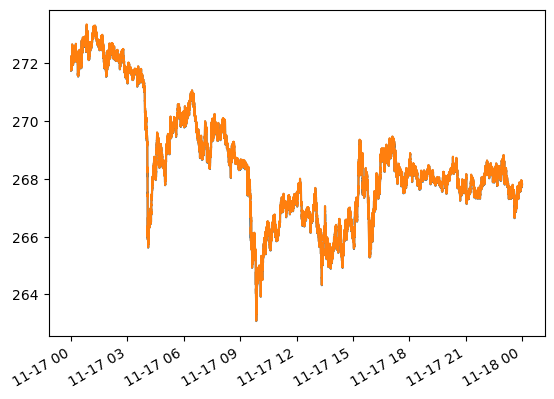

In [25]:
# Use Numba list for njit.
from numba.typed import List
from numba import float64

hbt = HftBacktest(df,
                  tick_size=0.01,
                  lot_size=0.01,
                  maker_fee=0.0002,
                  taker_fee=0.0007,
                  order_latency=FeedLatency(),
                  asset_type=Linear,
                  snapshot=snapshot_df)

local_timestamp = List.empty_list(float64, allocated=10000)
best_bid = List.empty_list(float64, allocated=10000)
best_ask = List.empty_list(float64, allocated=10000)

plot_bbo(hbt, local_timestamp, best_bid, best_ask)

local_timestamp = pd.to_datetime(local_timestamp, unit='us', utc=True)
best_bid = pd.Series(best_bid, index=local_timestamp)
best_ask = pd.Series(best_ask, index=local_timestamp)

best_bid.plot()
best_ask.plot()

### Printing stats

In [26]:
@njit
def submit_order_stats(hbt, recorder):
    buy_order_id = 1
    sell_order_id = 2
    half_spread = 100 * hbt.tick_size
    
    while hbt.run:
        if not hbt.elapse(60 * 1e6):
            return False
        
        hbt.clear_inactive_orders()
        
        mid = (hbt.best_bid + hbt.best_ask) / 2.0
        
        if buy_order_id not in hbt.orders:
            order_price = round((mid - half_spread) / hbt.tick_size) * hbt.tick_size
            order_qty = 1
            time_in_force = GTC
            hbt.submit_buy_order(buy_order_id, order_price, order_qty, time_in_force)
            
        if sell_order_id not in hbt.orders:
            order_price = round((mid + half_spread) / hbt.tick_size) * hbt.tick_size
            order_qty = 1
            time_in_force = GTC
            hbt.submit_sell_order(sell_order_id, order_price, order_qty, time_in_force)
            
        recorder.record(hbt)
    return True

=========== Summary ===========
Sharpe ratio: 4.6
Sortino ratio: 6.3
Risk return ratio: 100.1
Annualised return: 162.70 %
Max. draw down: 1.63 %
The number of trades per day: 6
Avg. daily trading volume: 6
Avg. daily trading amount: 1861
Max leverage: 0.94
Median leverage: 0.93


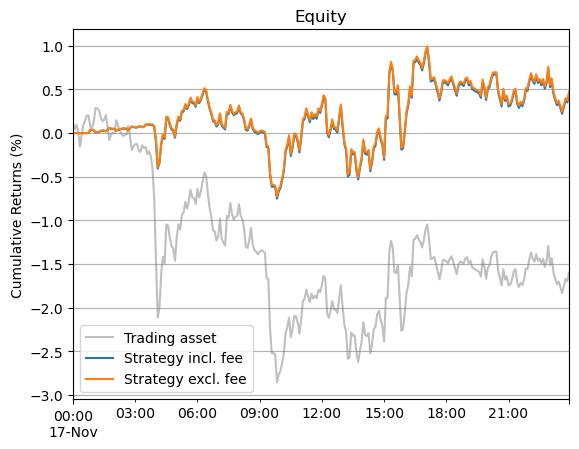

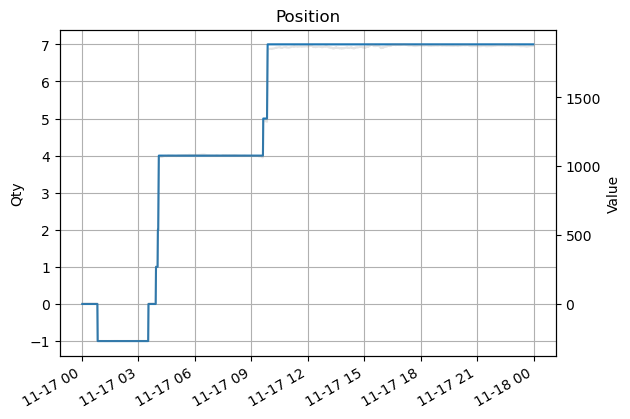

In [27]:
from hftbacktest import Stat

hbt = HftBacktest(df,
                  tick_size=0.01,
                  lot_size=0.01,
                  maker_fee=0.0002,
                  taker_fee=0.0007,
                  order_latency=FeedLatency(),
                  asset_type=Linear,
                  snapshot=snapshot_df)

stat = Stat(hbt)
submit_order_stats(hbt, stat.recorder)
stat.summary(capital=2000)